In [1]:
import pandas as pd
import numpy as np

In [2]:
# Download Dataset
raw_data = pd.read_csv("./Traffic.csv")

# Preprocessing data

In [3]:
df = raw_data[['Time', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total', 'Traffic Situation']]

In [4]:
df

,Time,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,Tuesday,13,2,2,24,41,normal
1,12:15:00 AM,Tuesday,14,1,1,36,52,normal
2,12:30:00 AM,Tuesday,10,2,2,32,46,normal
3,12:45:00 AM,Tuesday,10,2,2,36,50,normal
4,1:00:00 AM,Tuesday,11,2,1,34,48,normal
...,...,...,...,...,...,...,...,...
5947,10:45:00 PM,Thursday,16,3,1,36,56,normal
5948,11:00:00 PM,Thursday,11,0,1,30,42,normal
5949,11:15:00 PM,Thursday,15,4,1,25,45,normal
5950,11:30:00 PM,Thursday,16,5,0,27,48,normal


In [5]:
# Check null
df.isnull().sum()

Time                 0
Day of the week      0
CarCount             0
BikeCount            0
BusCount             0
TruckCount           0
Total                0
Traffic Situation    0
dtype: int64

In [6]:
df['Time'] = pd.to_datetime(df['Time']).dt.hour

C:\Users\USER\AppData\Local\Temp\ipykernel_9064\3206695382.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time'] = pd.to_datetime(df['Time']).dt.hour


In [7]:
df['Day of the week'].value_counts()

Tuesday      960
Wednesday    960
Thursday     960
Friday       768
Saturday     768
Sunday       768
Monday       768
Name: Day of the week, dtype: int64

In [8]:
df['Day of the week'] = df['Day of the week'].replace({
  'Monday':1,
  'Tuesday':2,
  'Wednesday':3,
  'Thursday':4,
  'Friday':5,
  'Saturday':6,
  'Sunday':7
})

C:\Users\USER\AppData\Local\Temp\ipykernel_9064\3000454048.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Day of the week'] = df['Day of the week'].replace({


In [9]:
df['Traffic Situation'].value_counts()

normal    3610
heavy     1137
low        834
high       371
Name: Traffic Situation, dtype: int64

In [10]:
df['Traffic Situation'] = df['Traffic Situation'].replace({
  'low':0,
  'normal':0,
  'high':1,
  'heavy':1
})

C:\Users\USER\AppData\Local\Temp\ipykernel_9064\3943949687.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Traffic Situation'] = df['Traffic Situation'].replace({


In [11]:
X = df[['Time', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total']]
y = df[['Traffic Situation']].values.reshape(df.shape[0])

In [12]:
df

,Time,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,0,2,13,2,2,24,41,0
1,0,2,14,1,1,36,52,0
2,0,2,10,2,2,32,46,0
3,0,2,10,2,2,36,50,0
4,1,2,11,2,1,34,48,0
...,...,...,...,...,...,...,...,...
5947,22,4,16,3,1,36,56,0
5948,23,4,11,0,1,30,42,0
5949,23,4,15,4,1,25,45,0
5950,23,4,16,5,0,27,48,0


In [13]:
# Split train and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [14]:
x_train = x_train/100
x_test = x_test/100

# Implement algorithm Logistic Regression

In [15]:
class LogisticRegression:
  def __init__(self, iteration=1000, learning_rete=0.01, c=0, penalty='l1'):
    self.iteration = iteration
    self.learning_rete = learning_rete
    self.c = c
    self.penalty=penalty.lower()
    self.w = None
    self.b = None
    self.loss = []
    self.accuracy = []

  def regularization(self):
    # L1 regularization 
    if self.penalty == 'l1':
      return self.c*np.sign(self.w)
    # L2 regularization 
    if self.penalty == 'l2':
      return self.c*self.w
    return np.zeros(self.x.shape[1])
  
  def sigmoid(self, z):
    return 1/(1+np.exp(-z))

  def fit(self, x, y, batch_size=1, random_seed = 4):
    np.random.seed(random_seed)
    self.x = x
    self.y = y
    num_samples, num_features = x.shape
    self.loss = []
    self.accuracy = []

    if (self.w is None and self.b is None):
      self.w = np.random.rand(num_features)
      self.b = 0

    # Gredient descent
    for i in range(self.iteration):
      
      # Calculate loss
      loss = self.cross_entropy(x, y)
      self.loss.append(loss)
      accuracy = self.score(x, y)
      self.accuracy.append(accuracy)
      print('iterations {} accuracy : {}  loss : {}'.format(i, accuracy, loss))

      # Random training data
      idx = np.random.choice(num_samples, int(batch_size*num_samples))
      x_batch = x.iloc[idx]
      y_batch = y[idx]

      # Predict
      z = np.dot(self.w, x_batch.T) + self.b
      y_pred = self.sigmoid(z)

      # Calculate gradient
      gred_w = np.dot(x_batch.T, (y_pred - y_batch))/num_samples
      gred_b = np.sum(y_pred - y_batch)/num_samples

      # Regularization
      gred_w = gred_w + self.regularization()
 
      # Update parameter
      self.w = self.w - (self.learning_rete*gred_w)
      self.b = self.b - (self.learning_rete*gred_b)

    return self

  def predict(self, x):
    z = np.dot(self.w, x.T) + self.b
    probYgivenX = self.sigmoid(z)
    return np.array([1 if p >= 0.5 else 0 for p in probYgivenX])

  def score(self, x, y):
    y_pred = self.predict(x)
    return np.mean(y == y_pred)
  
  def regularization_cost(self):
    # L1 regularization 
    if self.penalty == 'l1':
      return self.c*np.sum(np.abs(self.w))
    # L2 regularization 
    if self.penalty == 'l2':
      return self.c*np.sum(np.square(self.w))/2
    return 0
  
  def cross_entropy(self, x, y):
    eps = 1e-15  # Small constant value
    z = np.dot(self.w, x.T) + self.b
    y_pred = self.sigmoid(z)
    return -(np.dot(y.T,np.log(y_pred + eps)) + np.dot((1-y).T, np.log(1-y_pred + eps)))/x.shape[0] + self.regularization_cost()

# Training

In [16]:
clf = LogisticRegression(iteration=8000, learning_rete=0.01, c=0.01, penalty='l2')
clf.fit(x_train, y_train, batch_size=0.8)

iterations 0 accuracy : 0.2575089266960722  loss : 1.3750659208541867
iterations 1 accuracy : 0.2575089266960722  loss : 1.3690149663473548
iterations 2 accuracy : 0.2575089266960722  loss : 1.3630593185995274
iterations 3 accuracy : 0.2575089266960722  loss : 1.3571674322792076
iterations 4 accuracy : 0.2575089266960722  loss : 1.3511665020042662
iterations 5 accuracy : 0.2575089266960722  loss : 1.345401302214242
iterations 6 accuracy : 0.2575089266960722  loss : 1.339441892949886
iterations 7 accuracy : 0.2575089266960722  loss : 1.333645123168115
iterations 8 accuracy : 0.2575089266960722  loss : 1.327810288168624
iterations 9 accuracy : 0.2575089266960722  loss : 1.322026891720038
iterations 10 accuracy : 0.2575089266960722  loss : 1.3162730261026916
iterations 11 accuracy : 0.2575089266960722  loss : 1.3105434378742127
iterations 12 accuracy : 0.2575089266960722  loss : 1.30473686165305
iterations 13 accuracy : 0.2575089266960722  loss : 1.298849655777117
iterations 14 accuracy :

# Evaluate

In [17]:
clf.score(x_train, y_train), clf.score(x_test, y_test)

(0.9281663516068053, 0.9227539882451721)

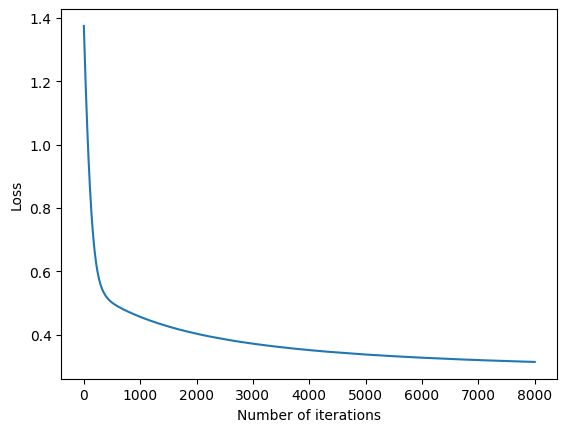

In [18]:
import matplotlib.pyplot as plt

plt.plot(np.arange(len(clf.loss)), clf.loss)
plt.xlabel("Number of iterations")
plt.ylabel("Loss")
plt.show()

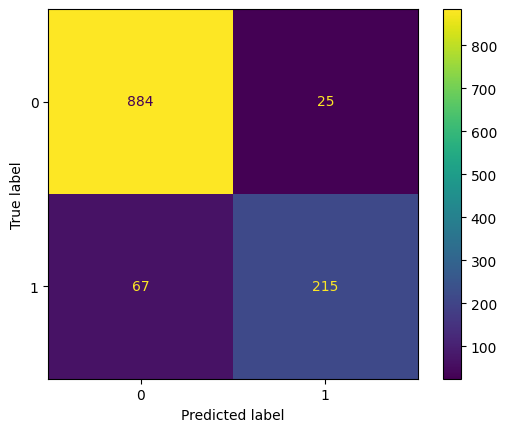

In [19]:
from sklearn import metrics
y_pred = clf.predict(x_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()